<div style="display: flex; justify-content: center; align-items: center; background-color: #644FBA; color: #FFFF; padding: 30px;">
<h1 style="margin: 0;">Automatic Detection Algorithm for Counterfeit Banknotes</h1>
</div>


<div style="font-family: Arial, sans-serif; background-color: #f9f9f9; border-left: 5px solid #644FBA; padding: 20px; margin-bottom: 20px;">
  <h1 style="color: #644FBA; margin-top: 0;">Objective of This Notebook</h1>
  <p style="color: #1E173B;">
    When a banknote arrives, we have a machine that records all its geometric characteristics. 
    Over our years of effort, we have observed differences in dimensions between genuine and counterfeit banknotes. 
    These differences are difficult to detect with the naked eye, but a machine should have no problem distinguishing them.
  </p>
  <p style="color: #1E173B;">
    Thus, an algorithm should be built that, based on the geometric characteristics of a banknote, 
    would be capable of determining whether it is genuine or counterfeit.
  </p>
</div>


<div style="font-family: Arial, sans-serif; background-color: #f9f9f9; border-left: 5px solid #644FBA; padding: 20px; margin-bottom: 20px;">
  <h2 style="color: #5A45B0; margin-top: 0;">Table of Contents</h2>
  <ul>
    <li><a href="#1" style="text-decoration: none; color: #644FBA;">Importing the libraries</a></li>
    <li><a href="#2" style="text-decoration: none; color: #644FBA;">Importing the dataset</a></li>
    <li><a href="#3" style="text-decoration: none; color: #644FBA;">Information about the data</a></li>
    <li><a href="#4" style="text-decoration: none; color: #644FBA;">Taking care of missing data</a></li>
    <li><a href="#5" style="text-decoration: none; color: #644FBA;">Training a model to predict missing values in margin_low</a></li>
    <li><a href="#6" style="text-decoration: none; color: #644FBA;">Training the model using new data to detect counterfeit banknotes</a>
      <ul>
        <li><a href="#61" style="text-decoration: none; color: #644FBA;">Data Visualization</a></li>
        <li><a href="#62" style="text-decoration: none; color: #644FBA;">Principal Component Analysis (PCA) from Scratch</a></li>
        <li><a href="#63" style="text-decoration: none; color: #644FBA;">Principal Component Analysis (PCA) with scikit-learn</a></li>
        <li><a href="#64" style="text-decoration: none; color: #644FBA;">Building and Training Models</a></li>
        <li><a href="#65" style="text-decoration: none; color: #644FBA;">Choosing a More Efficient Model</a></li>
      </ul>
    </li>
    <li><a href="#7" style="text-decoration: none; color: #644FBA;">Exporting the Model in "joblib" Format</a></li>
    <li><a href="#8" style="text-decoration: none; color: #644FBA;">Testing the Model</a></li>
    <li><a href="#9" style="text-decoration: none; color: #644FBA;">Model Performance Summary</a></li>
  </ul>
</div>


------

<div id="1" style="font-family: Arial, sans-serif; background-color: #f9f9f9; border-left: 5px solid #644FBA; padding: 20px; margin-bottom: 20px;">
  <h2 style="color: #5A45B0; margin-top: 0;">Importing the libraries</h2>
</div>    


In [72]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

<div id="2" style="font-family: Arial, sans-serif; background-color: #f9f9f9; border-left: 5px solid #644FBA; padding: 20px; margin-bottom: 20px;">
  <h2 style="color: #5A45B0; margin-top: 0;">Importing the dataset</h2>
</div>    


In [73]:
df = pd.read_csv("dataset/billets.csv", delimiter=";", header=None)

Handling the issue of missing header for the dataset

In [74]:
df.columns = ['is_genuine', 'diagonal', 'height_left', 'height_right', 'margin_low', 'margin_up', 'length']
df = df.iloc[1:].reset_index(drop=True)
df.head()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.5,4.4,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54


<div id="3" style="font-family: Arial, sans-serif; background-color: #f9f9f9; border-left: 5px solid #644FBA; padding: 20px; margin-bottom: 20px;">
  <h2 style="color: #5A45B0; margin-top: 0;">Information about the data
</h2>
</div>    


In [75]:
df.shape

(1500, 7)

In [76]:
df.columns

Index(['is_genuine', 'diagonal', 'height_left', 'height_right', 'margin_low',
       'margin_up', 'length'],
      dtype='object')

In [77]:
df.describe()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
count,1500,1500,1500,1500,1463,1500,1500
unique,2,159,155,170,285,123,336
top,True,171.99,103.95,103.76,4.08,3.08,113.38
freq,1000,28,30,28,20,35,19


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   is_genuine    1500 non-null   object
 1   diagonal      1500 non-null   object
 2   height_left   1500 non-null   object
 3   height_right  1500 non-null   object
 4   margin_low    1463 non-null   object
 5   margin_up     1500 non-null   object
 6   length        1500 non-null   object
dtypes: object(7)
memory usage: 82.2+ KB


In [79]:
df.isnull().sum()

is_genuine       0
diagonal         0
height_left      0
height_right     0
margin_low      37
margin_up        0
length           0
dtype: int64

<div id="4" style="font-family: Arial, sans-serif; background-color: #f9f9f9; border-left: 5px solid #5A45B0; padding: 20px; margin-bottom: 20px;">
  <h2 style="color: #5A45B0; margin-top: 0;">Taking care of missing data
</h2>
</div>    

In [80]:
df['is_genuine'] = df['is_genuine'].replace({'True': True, 'False': False})
df['is_genuine'] = df['is_genuine'].astype(int)

In [81]:
df.head(10)

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,1,171.81,104.86,104.95,4.52,2.89,112.83
1,1,171.46,103.36,103.66,3.77,2.99,113.09
2,1,172.69,104.48,103.5,4.4,2.94,113.16
3,1,171.36,103.91,103.94,3.62,3.01,113.51
4,1,171.73,104.28,103.46,4.04,3.48,112.54
5,1,172.17,103.74,104.08,4.42,2.95,112.81
6,1,172.34,104.18,103.85,4.58,3.26,112.81
7,1,171.88,103.76,104.08,3.98,2.92,113.08
8,1,172.47,103.92,103.67,4.0,3.25,112.85
9,1,172.47,104.07,104.02,4.04,3.25,113.45


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   is_genuine    1500 non-null   int32 
 1   diagonal      1500 non-null   object
 2   height_left   1500 non-null   object
 3   height_right  1500 non-null   object
 4   margin_low    1463 non-null   object
 5   margin_up     1500 non-null   object
 6   length        1500 non-null   object
dtypes: int32(1), object(6)
memory usage: 76.3+ KB


In [83]:
df['diagonal'] = pd.to_numeric(df['diagonal'], errors='coerce')
df['height_left'] = pd.to_numeric(df['height_left'], errors='coerce')
df['height_right'] = pd.to_numeric(df['height_right'], errors='coerce')
df['margin_up'] = pd.to_numeric(df['margin_up'], errors='coerce')
df['length'] = pd.to_numeric(df['length'], errors='coerce')

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1500 non-null   int32  
 1   diagonal      1500 non-null   float64
 2   height_left   1500 non-null   float64
 3   height_right  1500 non-null   float64
 4   margin_low    1463 non-null   object 
 5   margin_up     1500 non-null   float64
 6   length        1500 non-null   float64
dtypes: float64(5), int32(1), object(1)
memory usage: 76.3+ KB


<div id="5" style="font-family: Arial, sans-serif; background-color: #f9f9f9; border-left: 5px solid #644FBA; padding: 20px; margin-bottom: 20px;">
  <h2 style="color: #5A45B0; margin-top: 0;">Training a model to predict missing values in margin_low
</h2>
</div>    

In [85]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [163]:
backup_test = df.copy()

In [86]:
train_data = df.dropna(subset=['margin_low'])

In [87]:
train_data.shape

(1463, 7)

In [88]:
missing_data = df[df['margin_low'].isnull()]

In [89]:
X = train_data.drop(columns=['margin_low'])
y = train_data['margin_low']
print(f"Shape of y_test: {X.shape}")
print(f"Shape of y_test: {y.shape}")

Shape of y_test: (1463, 6)
Shape of y_test: (1463,)


In [90]:
y.head()

0    4.52
1    3.77
2     4.4
3    3.62
4    4.04
Name: margin_low, dtype: object

In [91]:
X_train , X_test , y_train , y_test = train_test_split( X , y , test_size = 0.2 , random_state = 42 )

In [92]:
print(f"Shape of y_test: {y_test.shape}")


Shape of y_test: (293,)


In [93]:
y_test.value_counts()

margin_low
4.12    6
4.0     6
3.99    6
4.41    5
3.84    5
       ..
3.71    1
5.35    1
4.19    1
4.54    1
6.0     1
Name: count, Length: 162, dtype: int64

In [94]:
model_dtr = DecisionTreeRegressor(random_state = 42)
model_dtr.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [95]:
X_missing = missing_data.drop(columns=['margin_low'])
predictions = model_dtr.predict(X_missing)

In [96]:
from sklearn.metrics import r2_score

y_pred = model_dtr.predict(X_test)

r2 = r2_score(y_test, y_pred)

print(f"R^2 Score: {r2}")

R^2 Score: 0.2645464140978395


In [97]:
y_pred

array([5.64, 4.16, 3.67, 4.94, 4.06, 3.9 , 5.51, 3.44, 4.54, 4.47, 5.77,
       4.63, 4.02, 3.9 , 4.31, 4.14, 4.12, 4.14, 4.06, 4.69, 3.95, 5.53,
       5.48, 4.16, 3.89, 3.86, 4.36, 4.41, 5.14, 4.36, 5.22, 3.79, 4.26,
       4.01, 3.64, 4.64, 3.69, 5.62, 6.11, 3.74, 3.93, 4.64, 5.65, 4.58,
       5.86, 4.31, 4.79, 4.82, 4.28, 5.66, 4.09, 3.52, 4.03, 4.1 , 4.22,
       4.01, 4.08, 3.83, 4.16, 4.31, 4.46, 5.25, 4.22, 3.7 , 4.93, 4.6 ,
       4.17, 4.74, 5.04, 4.24, 5.24, 3.88, 5.13, 3.99, 3.65, 4.47, 4.73,
       4.61, 4.14, 3.74, 5.1 , 4.92, 4.38, 5.88, 5.78, 5.26, 4.33, 4.14,
       4.5 , 4.66, 5.64, 4.89, 5.42, 4.9 , 4.25, 4.06, 3.86, 4.39, 4.67,
       4.56, 4.36, 3.82, 4.64, 4.  , 3.75, 4.4 , 4.09, 3.52, 6.54, 6.03,
       3.72, 4.27, 4.4 , 4.08, 4.29, 3.94, 4.35, 4.47, 4.94, 3.96, 5.82,
       3.97, 4.61, 5.21, 6.49, 5.97, 4.88, 5.69, 3.69, 4.07, 4.  , 3.9 ,
       4.62, 4.32, 5.05, 3.86, 3.96, 4.48, 5.34, 3.55, 4.01, 4.47, 4.23,
       3.52, 4.15, 3.76, 3.56, 4.23, 4.28, 4.79, 5.

In [98]:
y_test

1208    5.19
178     4.26
281     4.18
561     3.93
891     4.25
        ... 
1491    5.13
493     4.25
494     4.11
1080    5.61
1326     6.0
Name: margin_low, Length: 293, dtype: object

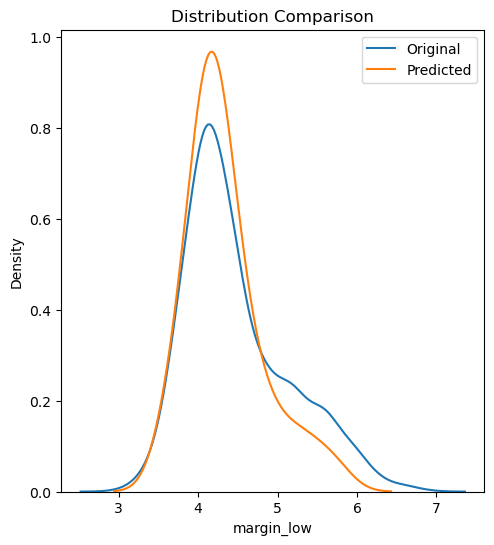

In [164]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.kdeplot(data=backup_test['margin_low'], label='Original')
sns.kdeplot(data=predictions, label='Predicted')
plt.title('Distribution Comparison')
plt.legend()

In [99]:
df.loc[df['margin_low'].isnull(), 'margin_low'] = predictions

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1500 non-null   int32  
 1   diagonal      1500 non-null   float64
 2   height_left   1500 non-null   float64
 3   height_right  1500 non-null   float64
 4   margin_low    1500 non-null   object 
 5   margin_up     1500 non-null   float64
 6   length        1500 non-null   float64
dtypes: float64(5), int32(1), object(1)
memory usage: 76.3+ KB


<div id ="6" style="font-family: Arial, sans-serif; background-color: #f9f9f9; border-left: 5px solid #644FBA; padding: 20px; margin-bottom: 20px;">
  <h2 style="color: #5A45B0; margin-top: 0;">Training the model using new data to detect counterfeit banknotes
</h2>
</div>    

In [101]:
df_new = df

In [102]:
df_new.head(10)

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,1,171.81,104.86,104.95,4.52,2.89,112.83
1,1,171.46,103.36,103.66,3.77,2.99,113.09
2,1,172.69,104.48,103.50,4.4,2.94,113.16
3,1,171.36,103.91,103.94,3.62,3.01,113.51
4,1,171.73,104.28,103.46,4.04,3.48,112.54
5,1,172.17,103.74,104.08,4.42,2.95,112.81
6,1,172.34,104.18,103.85,4.58,3.26,112.81
7,1,171.88,103.76,104.08,3.98,2.92,113.08
8,1,172.47,103.92,103.67,4.0,3.25,112.85
9,1,172.47,104.07,104.02,4.04,3.25,113.45


<div id="61" style="font-family: Arial, sans-serif; background-color: #f9f9f9; border-left: 5px solid #E97F61; padding: 20px; margin-bottom: 20px;">
  <h2 style="color: #E97F61; margin-top: 0;">Data Visualization
</h2>
</div>    

In [103]:
import seaborn as sns

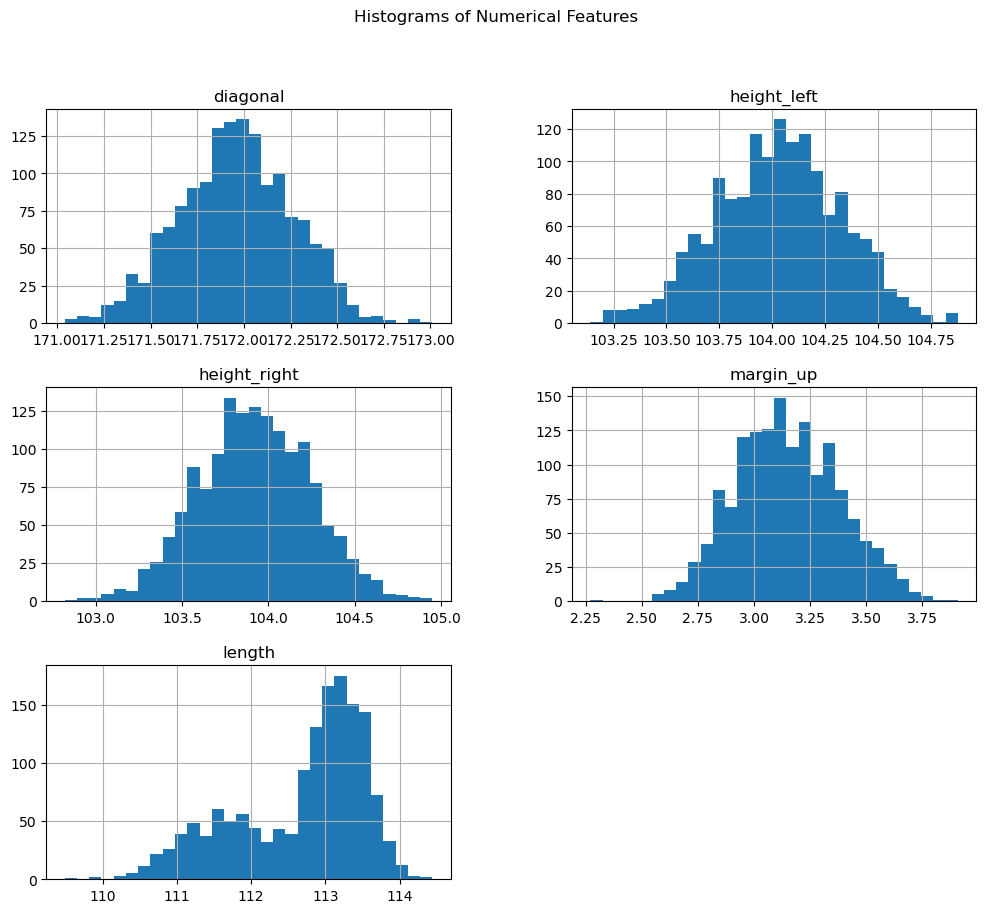

In [104]:
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
df[numerical_columns].hist(figsize=(12, 10), bins=30)
plt.suptitle("Histograms of Numerical Features")
plt.show()

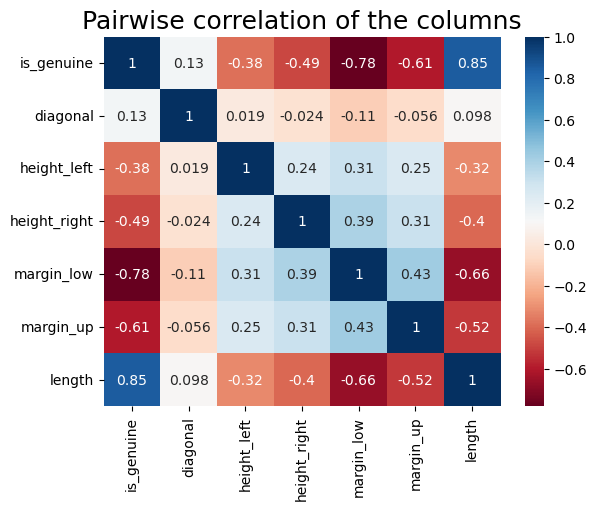

In [151]:
sns.heatmap(df.corr(), annot = True, cmap="RdBu")
plt.title("Pairwise correlation of the columns", fontsize = 18)
plt.show()

---

<div id="62" style="font-family: Arial, sans-serif; background-color: #f9f9f9; border-left: 5px solid #E97F61; padding: 20px; margin-bottom: 20px;">
  <h2 style="color: #E97F61; margin-top: 0;">Principal Component Analysis (PCA) from Scratch
</h2>
</div>    

In [138]:
class MyPCA:
    
    def __init__(self, n_components):
        self.n_components = n_components   
        
    def fit(self, X):
        # Standardize data 
        X = X.copy()
        self.mean = np.mean(X, axis = 0)
        self.scale = np.std(X, axis = 0)
        X_std = (X - self.mean) / self.scale
        
        # Eigendecomposition of covariance matrix       
        cov_mat = np.cov(X_std.T)
        eig_vals, eig_vecs = np.linalg.eig(cov_mat) 
        
        # Adjusting the eigenvectors that are largest in absolute value to be positive    
        max_abs_idx = np.argmax(np.abs(eig_vecs), axis=0)
        signs = np.sign(eig_vecs[max_abs_idx, range(eig_vecs.shape[0])])
        eig_vecs = eig_vecs*signs[np.newaxis,:]
        eig_vecs = eig_vecs.T
       
        eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[i,:]) for i in range(len(eig_vals))]
        eig_pairs.sort(key=lambda x: x[0], reverse=True)
        eig_vals_sorted = np.array([x[0] for x in eig_pairs])
        eig_vecs_sorted = np.array([x[1] for x in eig_pairs])
        
        self.components = eig_vecs_sorted[:self.n_components,:]
        
        # Explained variance ratio
        self.explained_variance_ratio = [i/np.sum(eig_vals) for i in eig_vals_sorted[:self.n_components]]
        
        self.cum_explained_variance = np.cumsum(self.explained_variance_ratio)

        return self

    def transform(self, X):
        
        X = X.copy()
        X_std = (X - self.mean) / self.scale
        X_proj = X_std.dot(self.components.T)
        
        return X_proj


### Reference
Reference 1 : [Principal Component Analysis from Scratch](https://bagheri365.github.io/blog/Principal-Component-Analysis-from-Scratch/)
Reference 2 : [[PCA]Principal Component Analysis from scratch](https://www.kaggle.com/code/avikumart/pca-principal-component-analysis-from-scratch)

In [139]:
df_new['margin_low'] = pd.to_numeric(df_new['margin_low'], errors='coerce')

In [140]:
my_pca = MyPCA(n_components = 2).fit(df_new.select_dtypes(include=[np.number]))

print('Components :\n', my_pca.components)
print('Explained variance ratio :\n', my_pca.explained_variance_ratio)
print('Cumulative explained variance :\n', my_pca.cum_explained_variance)

X_proj = my_pca.transform(X)
print('Transformed data shape from scratch:', X_proj.shape)

Components :
 [[ 0.50936811  0.07670661 -0.26623054 -0.32387817 -0.44511298 -0.3741602
   0.46985426]
 [ 0.04434992  0.92814135  0.33590498  0.13516429 -0.06342523  0.01452188
   0.03537701]]
Explained variance ratio :
 [0.49129578657844825, 0.1457652594400092]
Cumulative explained variance :
 [0.49129579 0.63706105]
Transformed data shape from scratch: (1500, 2)


<div id="63" style="font-family: Arial, sans-serif; background-color: #f9f9f9; border-left: 5px solid #E97F61; padding: 20px; margin-bottom: 20px;">
  <h2 style="color: #E97F61; margin-top: 0;">Principal Component Analysis (PCA) SKlearn
</h2>
</div>    

In [111]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(df_new.drop(columns=['is_genuine']))

from sklearn.decomposition import PCA
pca = PCA(n_components = 2).fit(X_std)

print('Components:\n', pca.components_)
print('Explained variance ratio:\n', pca.explained_variance_ratio_)

cum_explained_variance = np.cumsum(pca.explained_variance_ratio_)
print('Cumulative explained variance:\n', cum_explained_variance)

X_pca = pca.transform(X_std) # Apply dimensionality reduction to X.
print('Transformed data shape:', X_pca.shape)


Components:
 [[-0.08570279  0.33140075  0.3942739   0.50538534  0.43973637 -0.52782028]
 [ 0.94027982  0.30906698  0.11012525 -0.07706555 -0.00254321  0.04773178]]
Explained variance ratio:
 [0.43116453 0.16964202]
Cumulative explained variance:
 [0.43116453 0.60080655]
Transformed data shape: (1500, 2)


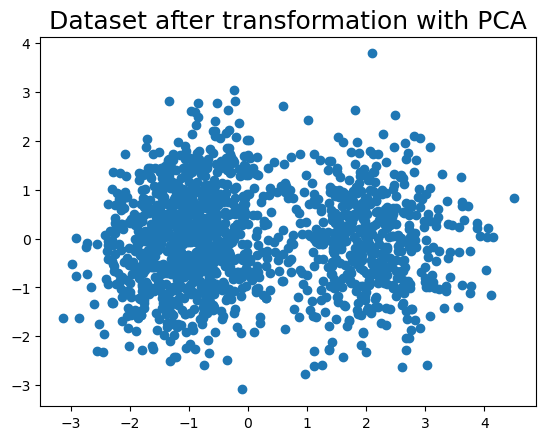

In [152]:
plt.scatter(x = X_pca[:,0], y = X_pca[:,1])
plt.title("Dataset after transformation with PCA", fontsize = 18)
plt.show()

<div id="64" style="font-family: Arial, sans-serif; background-color: #f9f9f9; border-left: 5px solid #E97F61; padding: 20px; margin-bottom: 20px;">
  <h2 style="color: #E97F61; margin-top: 0;">Building and Training Models
</h2>
</div>    

In [112]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix , ConfusionMatrixDisplay

In [113]:
X = df_new.drop(columns=['is_genuine'])  
y = df_new['is_genuine'] 

In [114]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

In [115]:
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(title)
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

In [116]:
dtc = DecisionTreeClassifier(random_state=40)
dtc.fit(X_train, y_train)
y_pred_dtc = dtc.predict(X_test)

In [117]:
rfc = RandomForestClassifier(random_state=40)
rfc.fit(X_train, y_train)
y_pred_rfc = dtc.predict(X_test)

In [118]:
lr = LogisticRegression(max_iter=1000, random_state=40)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

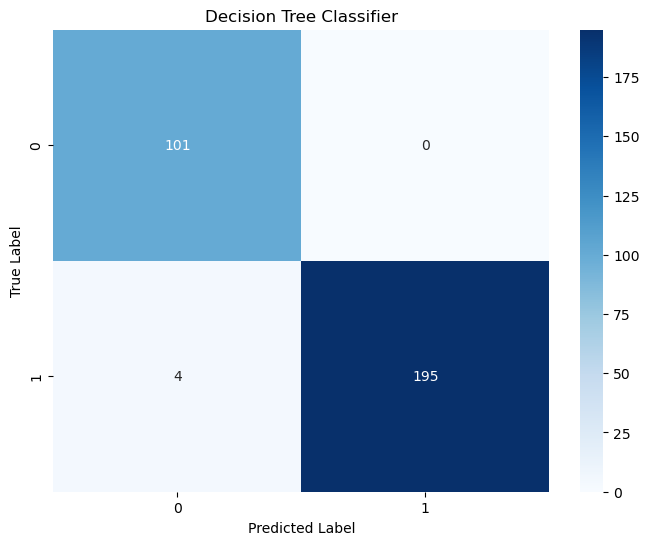

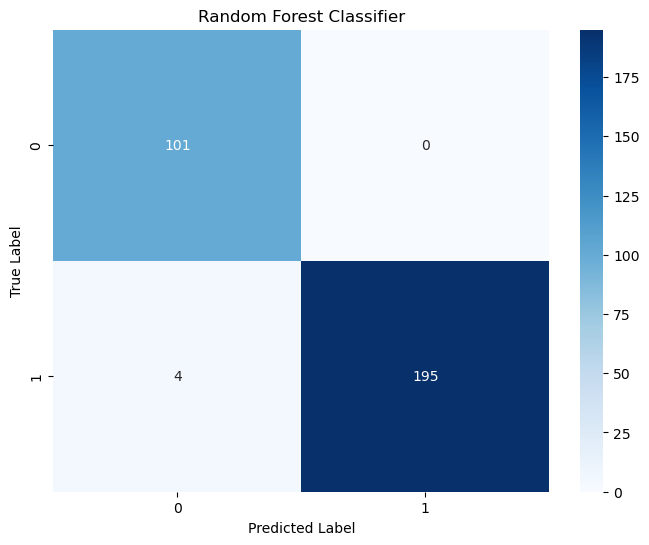

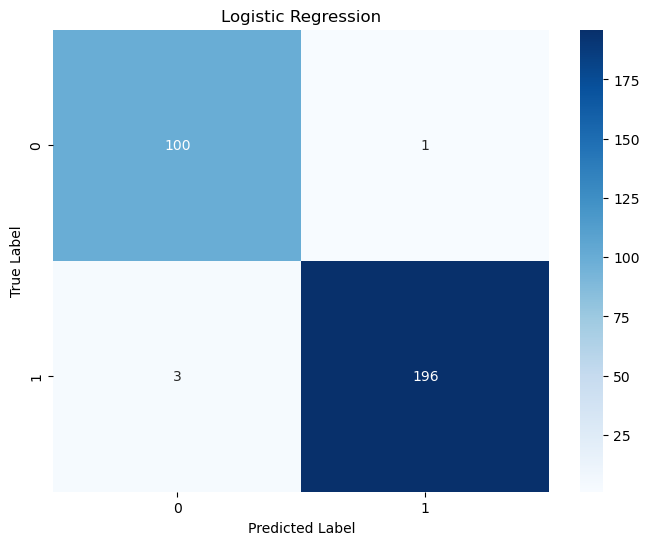

In [119]:
plot_confusion_matrix(y_test , y_pred_dtc , "Decision Tree Classifier" )
plot_confusion_matrix(y_test , y_pred_rfc , "Random Forest Classifier" )
plot_confusion_matrix(y_test , y_pred_lr , "Logistic Regression" )

In [120]:
def classification_models(X, y, test_size=0.2, random_state=0):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    models = {
        'Decision Tree': DecisionTreeClassifier(random_state=random_state),
        'Logistic Regression': LogisticRegression(max_iter=1000, random_state=random_state),
        'Random Forest': RandomForestClassifier(random_state=random_state)
    }
    
    results = {}
    for model_name, model in models.items():
        
        model.fit(X_train, y_train)
        
        y_pred = model.predict(X_test)
        
        accuracy = accuracy_score(y_test, y_pred)
        
        report = classification_report(y_test, y_pred)
        
        cm = confusion_matrix(y_test, y_pred)
        
        results[model_name] = {
            'Accuracy': f"{accuracy * 100 :.3f} %",
            'Classification Report': report,
            'Confusion Matrix': cm
        }
    
    return results

In [153]:
results = classification_models(X, y)

In [122]:
for model_name, result in results.items():
    print("\n")
    print("-"*55)
    print(f"{model_name} Results:")
    print(f"Accuracy: {result['Accuracy']}")
    print("Classification Report:")
    print(result['Classification Report'])
    print("Confusion Matrix:")
    print(result['Confusion Matrix'])
    print("\n")
print("-"*55)



-------------------------------------------------------
Decision Tree Results:
Accuracy: 98.333 %
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.97        97
           1       0.99      0.99      0.99       203

    accuracy                           0.98       300
   macro avg       0.98      0.98      0.98       300
weighted avg       0.98      0.98      0.98       300

Confusion Matrix:
[[ 95   2]
 [  3 200]]




-------------------------------------------------------
Logistic Regression Results:
Accuracy: 99.667 %
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        97
           1       1.00      1.00      1.00       203

    accuracy                           1.00       300
   macro avg       1.00      0.99      1.00       300
weighted avg       1.00      1.00      1.00       300

Confusion Matrix:
[[ 96   1]
 [  0 203]]




------

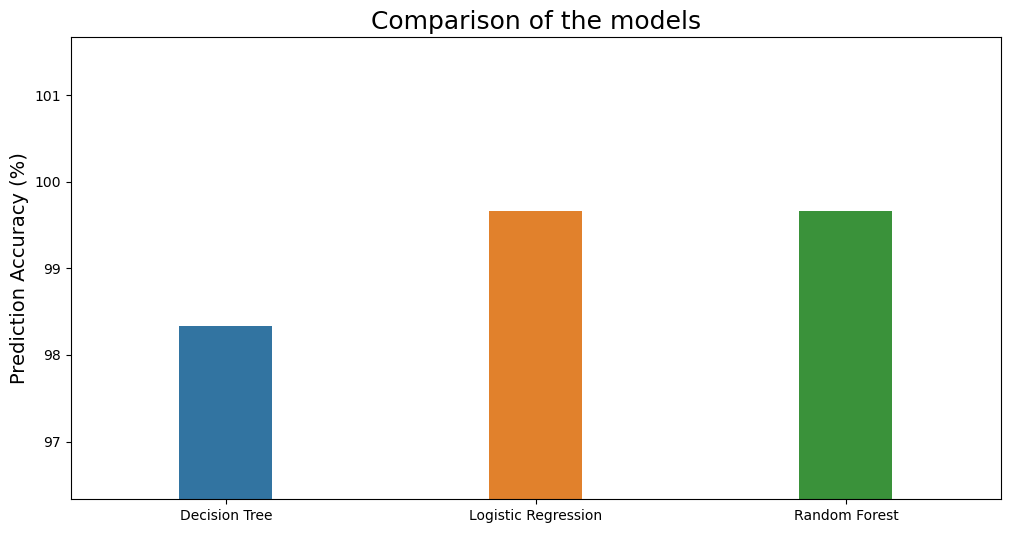

In [158]:
labels = []
height = []

for model_name, metrics in results.items():
    labels.append(model_name)  
    accuracy = float(metrics['Accuracy'].replace(' %', ''))  
    height.append(accuracy)

plt.figure(figsize=(12, 6))    
ax = sns.barplot(x=labels, y=height, width=0.3)  

ax.set_ylim(min(height) - 2, max(height) + 2)  

plt.title("Comparison of the models", fontsize=18)
plt.ylabel("Prediction Accuracy (%)", fontsize=14)
plt.show()

---

<div id="65" style="font-family: Arial, sans-serif; background-color: #f9f9f9; border-left: 5px solid #E97F61; padding: 20px; margin-bottom: 20px;">
  <h2 style="color: #E97F61; margin-top: 0;">Choosing a More Efficient Model
</h2>
</div>

In [123]:
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X, y, test_size=0.2, random_state=0)

In [124]:
model = LogisticRegression(max_iter=1000, random_state=0)
model.fit(X_train_new, y_train_new)

LogisticRegression(max_iter=1000, random_state=0)

In [125]:
y_pred_new = model.predict(X_test_new)

In [126]:
accuracy = accuracy_score(y_test_new, y_pred_new)
print(f"Accuracy {accuracy * 100 :.3f} %")

Accuracy 99.667 %


In [127]:
report = classification_report(y_test_new, y_pred_new)
print(report)

              precision    recall  f1-score   support

           0       1.00      0.99      0.99        97
           1       1.00      1.00      1.00       203

    accuracy                           1.00       300
   macro avg       1.00      0.99      1.00       300
weighted avg       1.00      1.00      1.00       300



<div id="7" style="font-family: Arial, sans-serif; background-color: #f9f9f9; border-left: 5px solid #5A45B0; padding: 20px; margin-bottom: 20px;">
    <h2 style="color: #5A45B0; margin-top: 0;">Exporting the Model in Format " joblib "
</h2>
</div>

In [128]:
import joblib

In [129]:
joblib.dump(model, 'logistic_regression_model.joblib')
print("Model saved successfully as 'logistic_regression_model.joblib'.")

Model saved successfully as 'logistic_regression_model.joblib'.


<div id="8" style="font-family: Arial, sans-serif; background-color: #f9f9f9; border-left: 5px solid #5A45B0; padding: 20px; margin-bottom: 20px;">
    <h2 style="color: #5A45B0; margin-top: 0;">Testing the Model 
</h2>
</div>

In [130]:
LR_model = joblib.load('logistic_regression_model.joblib')
y_pred = LR_model.predict(X_test_new)
y_pred

array([1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1])

In [131]:
probabilities = LR_model.predict_proba(X_test_new)[:, 1]

In [132]:
df_test_view = X_test_new

In [133]:
df_test_view.head(5)

,diagonal,height_left,height_right,margin_low,margin_up,length
471,172.58,104.17,103.13,4.64,3.17,113.05
9,172.47,104.07,104.02,4.04,3.25,113.45
1499,171.47,104.15,103.82,4.63,3.37,112.07
54,172.02,103.58,103.80,3.95,3.46,112.40
1411,171.95,104.39,104.31,5.98,3.23,111.33


In [134]:
test_new = y_test_new
df_test_view["is_genuine_test"] =  test_new
df_test_view["is_genuine_pred"] = y_pred_new
df_test_view['probability'] = probabilities


In [135]:
df_test_view["is_genuine_test"] = df_test_view["is_genuine_test"].replace({0: False, 1: True})
df_test_view["is_genuine_pred"] = df_test_view["is_genuine_pred"].replace({0: False, 1: True})

In [136]:
df_test_view

,diagonal,height_left,height_right,margin_low,margin_up,length,is_genuine_test,is_genuine_pred,probability
471,172.58,104.17,103.13,4.64,3.17,113.05,True,True,0.977030
9,172.47,104.07,104.02,4.04,3.25,113.45,True,True,0.994841
1499,171.47,104.15,103.82,4.63,3.37,112.07,False,False,0.137882
54,172.02,103.58,103.80,3.95,3.46,112.40,True,True,0.904248
1411,171.95,104.39,104.31,5.98,3.23,111.33,False,False,0.000046
...,...,...,...,...,...,...,...,...,...
220,171.26,103.59,103.80,4.11,3.25,113.03,True,True,0.991426
946,171.63,103.87,104.66,3.90,3.27,112.68,True,True,0.865299
992,171.79,103.69,103.68,3.65,2.77,112.78,True,True,0.999136
1496,172.19,104.63,104.44,5.27,3.37,110.97,False,False,0.000042


In [137]:
mismatch_count = (df_test_view["is_genuine_test"] != df_test_view["is_genuine_pred"]).sum()

print(f"Number of mismatched rows : {mismatch_count}")

Number of mismatched rows : 1


### Model Performance Note : Logistic Regression
---
<div id="9" style="border: 2px solid #4CAF50; border-radius: 5px; padding: 10px; background-color: #f9f9f9;">
  <h3  style="color: #4CAF50;">Model Performance Summary</h3>
  <p>
    Out of <b>300 rows</b>, the <b>Logistic Regression</b> model achieved an accuracy of <b>99.667%</b>, with only 
    <span style="color: red;"><b>1 error</b></span>.
  </p>
  <h4 style="color: #2196F3;">Explanation of the Error :</h4>
  <ul>
    <li><b>True Class :</b> <span style="color: #FF5722;">0</span> (Negative class)</li>
    <li><b>Predicted Class :</b> <span style="color: #4CAF50;">1</span> (Positive class)</li>
  </ul>
  <p>
    The model incorrectly identified one row as part of the positive class instead of the negative class. 
    Such errors can arise due to overlapping feature distributions or dataset limitations.
  </p>
  <h4 style="color: #2196F3;">Key Metrics :</h4>
  <ul>
    <li><b>Precision :</b> 100%</li>
    <li><b>Recall :</b> 99%</li>
    <li><b>F1-Score :</b> 99%</li>
  </ul>
  <h4 style="color: #4CAF50;">Conclusion :</h4>
  <p>
    While the model performs exceptionally well, this single misclassification highlights the need for further tuning to handle edge cases.
  </p>
</div>
